# woche 5

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## A Korrelation zwischen intervallskalierten Variablen
Erstellen Sie ein Balkendiagramm, welches die 10 stärksten Korrelationen zwischen intervallskalierten Variablen sortiert visuell darstellt (von hoher Korrelation zu niedriger Korrelation). 

## B Bewertung von Gruppen
Messen Sie die stat. Abhängig von duration mit der Zielvariablen classification. Stellen Sie die Mittelwerte und Std-Abweichungen von duration getrennt nach den Ausprägungen der Zielvariablen visuell dar.

## C Bewertung kategorischer Variablen
Geben Sie die Kontingenztabelle von 
    > i) checking account vs classification und 
    > ii) job vs classification mitsamt X²-Wert und p-Wert an. Welche Aussage kann aus dem p-Wert und der Kontingenztabelle abgeleitet werden?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare

In [3]:
filename = "credict_data_german.csv2.csv"
df = pd.read_csv(filename)

In [4]:
df.head()

,checking account,duration [month],credit history,purpose,amount,savings,employment,installment,status,debtors,...,property,age [years],plans,housing,existing credits,job,maintaining people,phone registered,foreign worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,bad


In [5]:
df.describe()

,duration [month],amount,installment,resident since,age [years],existing credits,maintaining people
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## aufgabe A
### A Korrelation zwischen intervallskalierten Variablen
Erstellen Sie ein Balkendiagramm, welches die 10 stärksten Korrelationen zwischen intervallskalierten Variablen sortiert visuell darstellt (von hoher Korrelation zu niedriger Korrelation). 


In [6]:
df.corr()

,duration [month],amount,installment,resident since,age [years],existing credits,maintaining people
duration [month],1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
resident since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age [years],-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
maintaining people,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [7]:
hilfsmatrix = df.corr().replace(to_replace=1.0, value=0)
hilfsarray = df.corr().round(decimals=2).to_numpy()

Text(0.5, 1.0, 'Korrellationsmatrix')

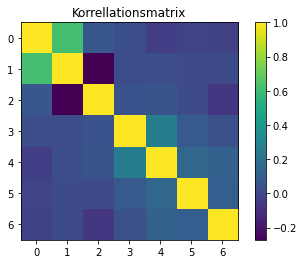

In [8]:
spalten = ['duration [month]', 'amount', 'installment', 'resident since',
       'age [years]', 'existing credits', 'maintaining people']

plt.imshow(df.corr(), 
    # cmap="Greys"
    )
plt.colorbar()

plt.title("Korrellationsmatrix")



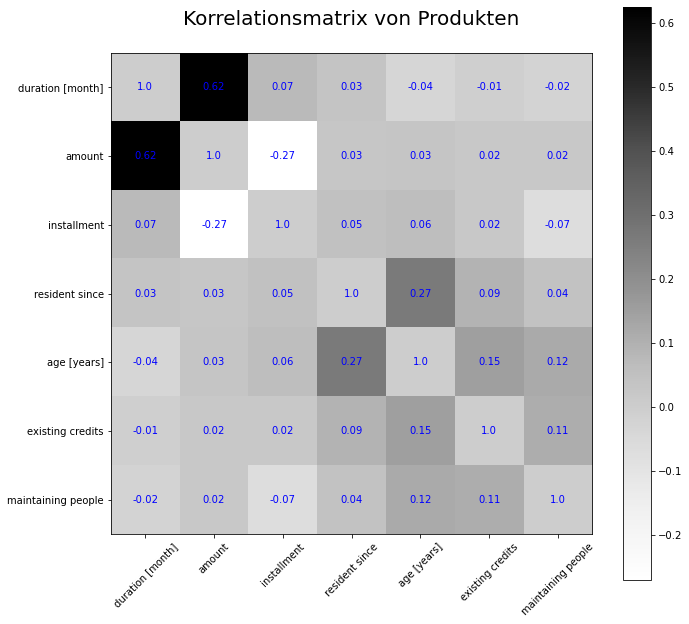

In [9]:
kat = ['duration [month]', 'amount', 'installment', 'resident since',
       'age [years]', 'existing credits', 'maintaining people']

fig, axis = plt.subplots(figsize=(10,10))

plt.imshow(hilfsmatrix, cmap="Greys")



axis.set_xticks(np.arange(len(kat)))
axis.set_yticks(np.arange(len(kat)))

axis.set_xticklabels(kat, rotation=45)
axis.set_yticklabels(kat)

axis.set_title("Korrelationsmatrix von Produkten\n", fontsize=20)

fig.tight_layout()
plt.colorbar()

# Loop over data dimensions and create text annotations.
for i in range(len(kat)):
    for j in range(len(kat)):
        text = axis.text(j, i, hilfsarray[i, j],
                       ha="center", va="center", color="blue")

In [10]:
df.describe().columns

Index(['duration [month]', 'amount', 'installment', 'resident since',
       'age [years]', 'existing credits', 'maintaining people'],
      dtype='object')

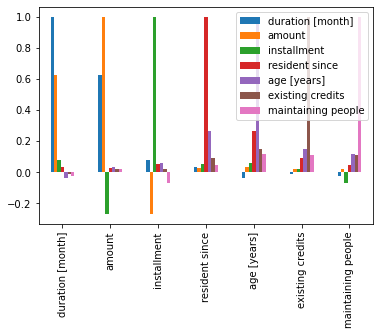

In [11]:

df.corr().plot.bar()

## aufgabe B

### B Bewertung von Gruppen
Messen Sie die stat. Abhängig von duration mit der Zielvariablen classification. Stellen Sie die Mittelwerte und Std-Abweichungen von duration getrennt nach den Ausprägungen der Zielvariablen visuell dar.


In [12]:
b = df.filter(["duration [month]","classification"], axis=1)
b.head()

,duration [month],classification
0,6,good
1,48,bad
2,12,good
3,42,good
4,24,bad


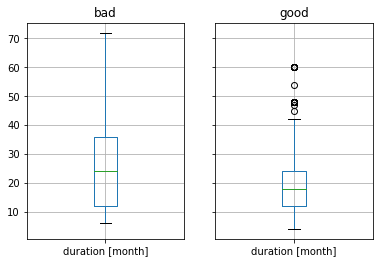

In [13]:
x = b.groupby("classification")
boxplot=x.boxplot()


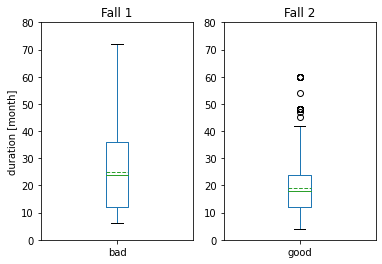

In [63]:
fig, axes = plt.subplots(1,2)

axes[0].set_ylabel("duration [month]")
axes[0].set_title("Fall 1")
axes[1].set_title("Fall 2")

x.get_group("bad").rename(columns={"duration [month]":"bad"}).plot.box(
    ax=axes[0],
    ylim=(0,80),
    showmeans=True,
    meanline=True,    
    )

x.get_group("good").rename(columns={"duration [month]":"good"}).plot.box(
    ax=axes[1],
    ylim=(0,80),
    showmeans=True,
    meanline=True,
    )

plt.savefig("aufgabeb.pdf")


In [ ]:
for i,c in x:
    print(i,c)

## C Bewertung kategorischer Variablen
Geben Sie die Kontingenztabelle von 
    > i) checking account vs classification und 
    > ii) job vs classification mitsamt X²-Wert und p-Wert an. 
          
          
Welche Aussage kann aus dem p-Wert und der Kontingenztabelle abgeleitet werden?

In [53]:
from scipy.stats import chi2_contingency

In [54]:
df.columns

Index(['checking account', 'duration [month]', 'credit history', 'purpose',
       'amount', 'savings', 'employment', 'installment', 'status', 'debtors',
       'resident since', 'property', 'age [years]', 'plans', 'housing',
       'existing credits', 'job', 'maintaining people', 'phone registered',
       'foreign worker', 'classification'],
      dtype='object')

# I

In [55]:
pd.crosstab(df["checking account"],df["classification"])

classification,bad,good
checking account,,
A11,135,139
A12,105,164
A13,14,49
A14,46,348


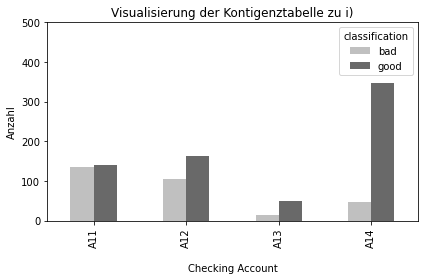

In [56]:


pd.crosstab(df["checking account"],df["classification"]).plot.bar(color=("silver","dimgrey"), ylim=(0,500))
plt.ylabel("Anzahl")
plt.xlabel("\nChecking Account")
plt.title("Visualisierung der Kontigenztabelle zu i)")
plt.tight_layout()
plt.savefig("zui.pdf")


In [117]:
chisquare(pd.crosstab(df["checking account"],df["classification"]))

Power_divergenceResult(statistic=array([120.82666667, 269.84      ]), pvalue=array([5.12147344e-26, 3.34258397e-58]))

In [57]:
chi2_contingency(pd.crosstab(df["checking account"],df["classification"]))

(123.72094351626559,
 1.2189020722893842e-26,
 3,
 array([[ 82.2, 191.8],
        [ 80.7, 188.3],
        [ 18.9,  44.1],
        [118.2, 275.8]]))

In [111]:
pd.crosstab(df["job"],df["classification"])

classification,bad,good
job,,
A171,7,15
A172,56,144
A173,186,444
A174,51,97


In [58]:
chi2_contingency(pd.crosstab(df["job"],df["classification"]))

(1.8851560280131707,
 0.5965815918843431,
 3,
 array([[  6.6,  15.4],
        [ 60. , 140. ],
        [189. , 441. ],
        [ 44.4, 103.6]]))

In [102]:
chisquare(pd.crosstab(df["job"],df["classification"]))

Power_divergenceResult(statistic=array([238.42666667, 600.03428571]), pvalue=array([2.08321847e-051, 9.90741734e-130]))

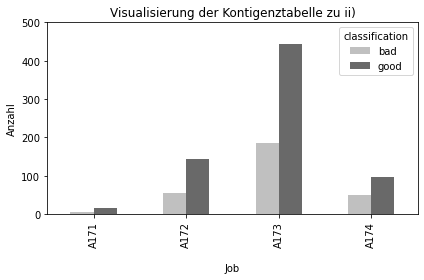

In [43]:
pd.crosstab(df["job"],df["classification"]).plot.bar(color=("silver","dimgrey"),ylim=(0,500))
plt.ylabel("Anzahl")
plt.xlabel("\nJob")
plt.title("Visualisierung der Kontigenztabelle zu ii)")
plt.tight_layout()
plt.savefig("zuii.pdf")